In [3]:
import cv2
import pytesseract

In [4]:
# Set the path to Tesseract executable (adjust this based on your installation)
pytesseract.pytesseract.tesseract_cmd = '/opt/homebrew/bin/tesseract'

In [5]:
file_path = 'Samples/invoice.png'

In [6]:
# Read the image (replace 'photo.jpg' with your image file path)
img = cv2.imread(file_path)

In [7]:
# Configuration for Tesseract (you can adjust this as needed)
config = ('-l eng --oem 1 --psm 3')

# Extract text from the image
extracted_text = pytesseract.image_to_string(img, config=config)

In [8]:
open('outfile.txt', 'w').write(extracted_text)

654

In [28]:
extracted_text

'Your Company Inc\nCompany No : U-1423242\n\nUnit 1, Lingkaran Syed Putra\n\nMid Valley City\n\n59200 Kuala Lumpur\n\nWilayah Persekutuan Kuala Lumpur\nTel: 03-9876 5432\n\nBill To:\n\nTarget Company Inc\n\nUnit 999, Lingkaran Syed Putra\n\nMid Valley City\n\n59200 Kuala Lumpur\n\nWilayah Persekutuan Kuala Lumpur\nTel: 03-1234 5678\n\nINVOICE\n\nInvoice No.: INV-42532622\nInvoice Date: 2021-05-23\n\nNo Description Quantity Unit Price, $ Price, $\n1 |Lorems ipsum 5 2.30 11.50\n2 |Consectetur adipiscing el 2 5.63 11.26\n3 | Quis autem vel eum i 3 3.63 10.89\n\nSubtotal 33.65\nTax Amount 1.68\nGrand total 35.33\n\nNote: The tax invoice is computer generated and no signature is required.\n\n'

In [2]:
import re

def identify_text_blocks(text):
    # Split the text into lines
    lines = text.split('\n')
    
    # Initialize variables
    blocks = []
    current_block = []
    
    for line in lines:
        # Split line by delimiters
        parts = re.split(r'(:|\s{2,})', line)
        
        for part in parts:
            if part in [':', '  ']:
                # If current_block is not empty, add it to blocks
                if current_block:
                    blocks.append(''.join(current_block).strip())
                    current_block = []
                # Add the delimiter as a new block
                blocks.append(part)
            elif part.strip():
                # Add the part to the current block
                current_block.append(part)
        
        # New line indicates a separate block
        if current_block:
            blocks.append(''.join(current_block).strip())
            current_block = []
    
    return blocks

with open("outfile.txt","r") as f:
    text = f.read()
    
# Identify text blocks
blocks = identify_text_blocks(text)

# Print the blocks
for i, block in enumerate(blocks):
    print(f"Block {i+1}:\n{block}\n")


Block 1:
Your Company IncBill To

Block 2:
:

Block 3:
Company No

Block 4:
:

Block 5:
U-1423242Target Company Inc

Block 6:
Unit 1, Lingkaran Syed PutraUnit 999, Lingkaran Syed Putra

Block 7:
Mid Valley CityMid Valley City

Block 8:
59200 Kuala Lumpur59200 Kuala Lumpur

Block 9:
Wilayah Persekutuan Kuala LumpurWilayah Persekutuan Kuala Lumpur

Block 10:
Tel

Block 11:
:

Block 12:
03-9876 5432Tel

Block 13:
:

Block 14:
03-1234 567

Block 15:
INVOICE

Block 16:
Invoice No.

Block 17:
:

Block 18:
INV-42532622Invoice Date

Block 19:
:

Block 20:
2021-05-23

Block 21:
No Description Quantity Unit Price, $ Price, $

Block 22:
1 | Lorems ipsum 5 2.30 11.50

Block 23:
2 | Consectetur adipiscing el 2 5.63 11.26

Block 24:
3 | Quis autem vel eum i 3 3.63 10.89

Block 25:
Subtotal 33.65Tax Amount 1.68Grand total 35.33

Block 26:
Note

Block 27:
:

Block 28:
The tax invoice is computer generated and no signature is required.



In [93]:
import email
from email import policy
from email.parser import BytesParser

def extract_text_from_email(file_path):
    with open(file_path, 'rb') as f:
        msg = BytesParser(policy=policy.default).parse(f)
    
    # Extract the plain text part
    text = ""
    if msg.is_multipart():
        for part in msg.iter_parts():
            if part.get_content_type() == "text/plain":
                text = part.get_payload(decode=True).decode(part.get_content_charset())
                break
    else:
        text = msg.get_payload(decode=True).decode(msg.get_content_charset())
    
    return text

# Example usage
file_path = 'Fwd_ Invoice for Payment.eml'
email_text = extract_text_from_email(file_path)
print(email_text)




> Begin forwarded message:
> 
> From: SIVARAMAKRISHNAN SIVALINGAM <sivajaya2009@gmail.com>
> Subject: Invoice for Payment
> Date: 28 July 2024 at 5:07:22 PM IST
> To: Sivaramakrishnan Sivalingam <sivajaya2009@gmail.com>
> 
> Invoice No.: INV-42532622                   Invoice Date: 2021-05-23
> 
> No Description Quantity Unit Price, $ Price, $
> 1 | Lorems ipsum 5 2.30 11.50
> 2 | Consectetur adipiscing el 2 5.63 11.26
> 3 | Quis autem vel eum i 3 3.63 10.89
> 
> Subtotal 33.65     Tax Amount 1.68    Grand total 35.33
> 
> Note: The tax invoice is computer generated and no signature is required.




In [94]:
import pandas as pd

In [95]:
text=email_text

In [96]:
lines=text.split('\n')
lines = list(filter(None, lines))
lines

['> Begin forwarded message:',
 '> ',
 '> From: SIVARAMAKRISHNAN SIVALINGAM <sivajaya2009@gmail.com>',
 '> Subject: Invoice for Payment',
 '> Date: 28 July 2024 at 5:07:22\u202fPM IST',
 '> To: Sivaramakrishnan Sivalingam <sivajaya2009@gmail.com>',
 '> ',
 '> Invoice No.: INV-42532622                   Invoice Date: 2021-05-23',
 '> ',
 '> No Description Quantity Unit Price, $ Price, $',
 '> 1 | Lorems ipsum 5 2.30 11.50',
 '> 2 | Consectetur adipiscing el 2 5.63 11.26',
 '> 3 | Quis autem vel eum i 3 3.63 10.89',
 '> ',
 '> Subtotal 33.65     Tax Amount 1.68    Grand total 35.33',
 '> ',
 '> Note: The tax invoice is computer generated and no signature is required.']

In [97]:
blocks = []
finalb = []
idx = 0
rowidx = 1 
side_node_idx = 0
below_node_idx = 0
for line in lines:
    blocks.append(list(filter(None,line.split('  '))))

for block in blocks:
    vali = 0
    for i, bpart in enumerate(block):
        text=bpart.strip()
        side_note_text = block[vali+1] if vali+1 < len(block) else ''
        side_node_idx = (idx + 1) if side_note_text!='' else -1

        if rowidx < len(blocks):
            below_note_text = blocks[rowidx][vali] if vali < len(blocks[rowidx]) else ''
            below_node_idx = (idx + len(block)) if below_note_text!='' else -1
        else:
            below_note_text = ''
            below_node_idx = -1

        blockt = {'idx':idx,'text':text,'side_note_text':side_note_text,'side_node_idx':side_node_idx,'below_note_text':below_note_text,'below_node_idx':below_node_idx}
        idx += 1
        vali += 1
        #print(blockt)
        finalb.append(blockt)
    rowidx +=1
df = pd.DataFrame(finalb)
df

,idx,text,side_note_text,side_node_idx,below_note_text,below_node_idx
0,0,> Begin forwarded message:,,-1,>,1
1,1,>,,-1,> From: SIVARAMAKRISHNAN SIVALINGAM <sivajaya2...,2
2,2,> From: SIVARAMAKRISHNAN SIVALINGAM <sivajaya2...,,-1,> Subject: Invoice for Payment,3
3,3,> Subject: Invoice for Payment,,-1,> Date: 28 July 2024 at 5:07:22 PM IST,4
4,4,> Date: 28 July 2024 at 5:07:22 PM IST,,-1,> To: Sivaramakrishnan Sivalingam <sivajaya200...,5
5,5,> To: Sivaramakrishnan Sivalingam <sivajaya200...,,-1,>,6
6,6,>,,-1,> Invoice No.: INV-42532622,7
7,7,> Invoice No.: INV-42532622,Invoice Date: 2021-05-23,8,>,9
8,8,Invoice Date: 2021-05-23,,-1,,-1
9,9,>,,-1,"> No Description Quantity Unit Price, $ Price, $",10


In [15]:
list(blocks[idx-1])[1:3]

['Your Company Inc', 'Bill To:']

In [23]:
blocks = []
idx = 0
for line in lines:
    if '  ' in line:
        parts = line.split('  ', 1)
        blocks.append((idx, parts[0].strip(), parts[1].strip(), 'side_node_text'))
        idx += 1
        for bpart in list(blocks[idx-1])[1:3]:
            if ':' in bpart:
                parts = bpart.split(':', 1)
                blocks.append((idx, parts[0].strip(), parts[1].strip(), 'side_node_text'))
                idx += 1
    else:
        blocks.append((idx, line.strip(), '', ''))
        idx += 1
blocks

[(0, 'Your Company Inc', 'Bill To:', 'side_node_text'),
 (1, 'Bill To', '', 'side_node_text'),
 (2, 'Company No : U-1423242', 'Target Company Inc', 'side_node_text'),
 (3, 'Company No', 'U-1423242', 'side_node_text'),
 (4,
  'Unit 1, Lingkaran Syed Putra',
  'Unit 999, Lingkaran Syed Putra',
  'side_node_text'),
 (5, 'Mid Valley City', 'Mid Valley City', 'side_node_text'),
 (6, '59200 Kuala Lumpur', '59200 Kuala Lumpur', 'side_node_text'),
 (7,
  'Wilayah Persekutuan Kuala Lumpur',
  'Wilayah Persekutuan Kuala Lumpur',
  'side_node_text'),
 (8, 'Tel: 03-9876 5432', 'Tel: 03-1234 567', 'side_node_text'),
 (9, 'Tel', '03-9876 5432', 'side_node_text'),
 (10, 'Tel', '03-1234 567', 'side_node_text'),
 (11, 'INVOICE', '', ''),
 (12,
  'Invoice No.: INV-42532622',
  'Invoice Date: 2021-05-23',
  'side_node_text'),
 (13, 'Invoice No.', 'INV-42532622', 'side_node_text'),
 (14, 'Invoice Date', '2021-05-23', 'side_node_text'),
 (15, 'No Description Quantity Unit Price, $ Price, $', '', ''),
 (16,

In [24]:
data = []
ptag = ''
sid =1
ssid =1
for i, (idx, text, side_node_text, tag) in enumerate(blocks):
    if tag == 'side_node_text' and side_node_text != '':
        side_node_idx = i + 1 if side_node_text else -1
        below_node_idx = i + 1 if i + 1 < len(blocks) else -1
        below_node_text = blocks[below_node_idx][1] if below_node_idx != -1 else ''
        below_node_idx = below_node_idx + sid
        sid = sid + 1
        if ptag == 'side':
            side_node_idx += ssid
            ssid = ssid + 1
        data.append([idx, text, side_node_text, side_node_idx, below_node_text, below_node_idx])
    else:
        side_node_idx = i + 1 if side_node_text else -1
        below_node_idx = i + 1 if i + 1 < len(blocks) else -1
        below_node_text = blocks[below_node_idx][1] if below_node_idx != -1 else ''
        data.append([idx, text, side_node_text, side_node_idx, below_node_text, below_node_idx])

df = pd.DataFrame(data, columns=["Index", "Text", "SideNodeText", "SideNodeIndex", "BelowNodeText", "BelowNodeIndex"])
df

,Index,Text,SideNodeText,SideNodeIndex,BelowNodeText,BelowNodeIndex
0,0,Your Company Inc,Bill To:,1,Bill To,2
1,1,Bill To,,-1,Company No : U-1423242,2
2,2,Company No : U-1423242,Target Company Inc,3,Company No,5
3,3,Company No,U-1423242,4,"Unit 1, Lingkaran Syed Putra",7
4,4,"Unit 1, Lingkaran Syed Putra","Unit 999, Lingkaran Syed Putra",5,Mid Valley City,9
5,5,Mid Valley City,Mid Valley City,6,59200 Kuala Lumpur,11
6,6,59200 Kuala Lumpur,59200 Kuala Lumpur,7,Wilayah Persekutuan Kuala Lumpur,13
7,7,Wilayah Persekutuan Kuala Lumpur,Wilayah Persekutuan Kuala Lumpur,8,Tel: 03-9876 5432,15
8,8,Tel: 03-9876 5432,Tel: 03-1234 567,9,Tel,17
9,9,Tel,03-9876 5432,10,Tel,19


In [1]:
import pandas as pd

def identify_text_blocks(text):
    lines = text.split('\n')
    blocks = []
    idx = 0

    for line in lines:
        if ':' in line:
            parts = line.split(':', 1)
            blocks.append((idx, parts[0].strip(), parts[1].strip(), 'side_node_text'))
            idx += 1
        elif '  ' in line:
            parts = line.split('  ', 1)
            blocks.append((idx, parts[0].strip(), parts[1].strip(), 'side_node_text'))
            idx += 1
        else:
            blocks.append((idx, line.strip(), '', ''))
            idx += 1

    data = []
    for i, (idx, text, side_node_text, tag) in enumerate(blocks):
        side_node_idx = i + 1 if side_node_text else -1
        below_node_idx = i + 1 if i + 1 < len(blocks) else -1
        below_node_text = blocks[below_node_idx][1] if below_node_idx != -1 else ''
        data.append([idx, text, side_node_text, side_node_idx, below_node_text, below_node_idx])

    df = pd.DataFrame(data, columns=["Index", "Text", "SideNodeText", "SideNodeIndex", "BelowNodeText", "BelowNodeIndex"])
    return df

sample_text = """
Your Company Inc
Company No : U-1423242

Unit 1, Lingkaran Syed Putra

Mid Valley City

59200 Kuala Lumpur

Wilayah Persekutuan Kuala Lumpur
Tel: 03-9876 5432

Bill To:

Target Company Inc

Unit 999, Lingkaran Syed Putra

Mid Valley City

59200 Kuala Lumpur

Wilayah Persekutuan Kuala Lumpur
Tel: 03-1234 5678

INVOICE

Invoice No.: INV-42532622
Invoice Date: 2021-05-23

Subtotal 33.65
Tax Amount 1.68
Grand total 35.33
"""

df = identify_text_blocks(sample_text)
df


,Index,Text,SideNodeText,SideNodeIndex,BelowNodeText,BelowNodeIndex
0,0,,,-1,Your Company Inc,1
1,1,Your Company Inc,,-1,Company No,2
2,2,Company No,U-1423242,3,,3
3,3,,,-1,"Unit 1, Lingkaran Syed Putra",4
4,4,"Unit 1, Lingkaran Syed Putra",,-1,,5
5,5,,,-1,Mid Valley City,6
6,6,Mid Valley City,,-1,,7
7,7,,,-1,59200 Kuala Lumpur,8
8,8,59200 Kuala Lumpur,,-1,,9
9,9,,,-1,Wilayah Persekutuan Kuala Lumpur,10


In [40]:
import pandas as pd

def process_text(text):
    """
    Processes the given text based on the specified conditions and returns a DataFrame.

    Args:
        text: The input text to be processed.

    Returns:
        A pandas DataFrame containing the processed text, side nodes, and indices.
    """

    lines = text.splitlines()
    data = []
    side_node_index = -1
    below_node_index = -1

    for i, line in enumerate(lines):
        line = line.strip()

        if not line:
            continue

        if line.startswith(" ") or ":" in line:
            side_node_index += 1
            side_node_text = line.strip(": ")
            data.append({
                "Index": i,
                "Text": "",
                "SideNodeText": side_node_text,
                "SideNodeIndex": side_node_index,
                "BelowNodeText": "",
                "BelowNodeIndex": below_node_index
            })
            continue

        below_node_index += 1
        data.append({
            "Index": i,
            "Text": line,
            "SideNodeText": "",
            "SideNodeIndex": side_node_index,
            "BelowNodeText": "",
            "BelowNodeIndex": below_node_index
        })

    df = pd.DataFrame(data)
    df["SideNodeIndex"] = df["SideNodeIndex"].fillna(-1).astype(int)
    df["BelowNodeIndex"] = df["BelowNodeIndex"].fillna(-1).astype(int)

    return df

# Sample text
text = """
Your Company Inc
Company No : U-1423242

Unit 1, Lingkaran Syed Putra

Mid Valley City

59200 Kuala Lumpur

Wilayah Persekutuan Kuala Lumpur
Tel: 03-9876 5432

Bill To:

Target Company Inc

Unit 999, Lingkaran Syed Putra

Mid Valley City

59200 Kuala Lumpur

Wilayah Persekutuan Kuala Lumpur
Tel: 03-1234 5678

INVOICE

Invoice No.: INV-42532622
Invoice Date: 2021-05-23

No Description Quantity Unit Price, $ Price, $
1 |Lorems ipsum 5 2.30 11.50
2 |Consectetur adipiscing el 2 5.63 11.26
3 | Quis autem vel eum i 3 3.63 10.89

Subtotal 33.65
Tax Amount 1.68
Grand total 35.33
"""

df = process_text(text)
df


,Index,Text,SideNodeText,SideNodeIndex,BelowNodeText,BelowNodeIndex
0,1,Your Company Inc,,-1,,0
1,2,,Company No : U-1423242,0,,0
2,4,"Unit 1, Lingkaran Syed Putra",,0,,1
3,6,Mid Valley City,,0,,2
4,8,59200 Kuala Lumpur,,0,,3
5,10,Wilayah Persekutuan Kuala Lumpur,,0,,4
6,11,,Tel: 03-9876 5432,1,,4
7,13,,Bill To,2,,4
8,15,Target Company Inc,,2,,5
9,17,"Unit 999, Lingkaran Syed Putra",,2,,6


In [13]:
import pandas as pd
import re

def process_text(text):
    # Step 1: Add new line in each line
    #text = re.sub(r'(?<!\n)(?=\S)', '\n', text.strip())

    # Split text into lines
    lines = text.split('\n')

    # Initialize variables
    data = []
    current_index = -1
    side_node_index = -1
    below_node_index = -1
    side_node_text = None
    below_node_text = None

    # Process each line
    for i, line in enumerate(lines):
        line = line.strip()
        
        if not line:
            continue
        
        # Handle delimiters
        if re.search(r'[:|]', line):
            if side_node_text:
                data.append([current_index, line, side_node_text, side_node_index, below_node_text, below_node_index])
                side_node_text = None
                below_node_text = None
            else:
                data.append([current_index, line, None, -1, None, -1])
            continue
        
        # Handle side node condition
        if len(re.findall(r'\s+', line)) > 1:
            if side_node_text:
                data.append([current_index, line, side_node_text, side_node_index, below_node_text, below_node_index])
                side_node_text = None
                below_node_text = None
            side_node_text = line
            side_node_index = i
            continue
        
        # Update current node data
        if side_node_text:
            below_node_text = line
            below_node_index = i
            continue
        
        # Regular case
        if current_index != -1:
            data.append([current_index, line, side_node_text, side_node_index, below_node_text, below_node_index])
            side_node_text = None
            below_node_text = None
        
        # Update current node
        current_index = i

    # Add last line
    if current_index != -1:
        data.append([current_index, lines[-1], side_node_text, side_node_index, below_node_text, below_node_index])

    # Create DataFrame
    df = pd.DataFrame(data, columns=["Index", "Text", "SideNodeText", "SideNodeIndex", "BelowNodeText", "BelowNodeIndex"])

    # Adjust indices
    # df["SideNodeIndex"].replace(-1, df["Index"], inplace=True)
    # df["BelowNodeIndex"].replace(-1, df["Index"], inplace=True)

    return df

# Sample input text
input_text = """Your Company Inc
Company No : U-1423242

Unit 1, Lingkaran Syed Putra

Mid Valley City

59200 Kuala Lumpur

Wilayah Persekutuan Kuala Lumpur
Tel: 03-9876 5432

Bill To:

Target Company Inc

Unit 999, Lingkaran Syed Putra

Mid Valley City

59200 Kuala Lumpur

Wilayah Persekutuan Kuala Lumpur
Tel: 03-1234 5678

INVOICE

Invoice No.: INV-42532622
Invoice Date: 2021-05-23

No Description Quantity Unit Price, $ Price, $
1 |Lorems ipsum 5 2.30 11.50
2 |Consectetur adipiscing el 2 5.63 11.26
3 | Quis autem vel eum i 3 3.63 10.89

Subtotal 33.65
Tax Amount 1.68
Grand total 35.33"""

# Process the input text and get the DataFrame
df = process_text(input_text)

# Print the DataFrame
df


,Index,Text,SideNodeText,SideNodeIndex,BelowNodeText,BelowNodeIndex
0,-1,Company No : U-1423242,Your Company Inc,0,None,-1
1,-1,Mid Valley City,"Unit 1, Lingkaran Syed Putra",3,None,-1
2,-1,59200 Kuala Lumpur,Mid Valley City,5,None,-1
3,-1,Wilayah Persekutuan Kuala Lumpur,59200 Kuala Lumpur,7,None,-1
4,-1,Tel: 03-9876 5432,Wilayah Persekutuan Kuala Lumpur,9,None,-1
5,-1,Bill To:,None,-1,None,-1
6,-1,"Unit 999, Lingkaran Syed Putra",Target Company Inc,14,None,-1
7,-1,Mid Valley City,"Unit 999, Lingkaran Syed Putra",16,None,-1
8,-1,59200 Kuala Lumpur,Mid Valley City,18,None,-1
9,-1,Wilayah Persekutuan Kuala Lumpur,59200 Kuala Lumpur,20,None,-1


In [27]:
import pandas as pd

def process_text(input_text):
    lines = input_text.split('\n')
    data = []
    index = 0

    for i, line in enumerate(lines):
        if line.strip() == '':
            continue

        parts = line.split()
        text = ' '.join(parts)
        side_node_text = ''
        side_node_index = -1
        below_node_text = ''
        below_node_index = -1

        if ':' in text:
            text, side_node_text = text.split(':', 1)
            side_node_text = side_node_text.strip()
            side_node_index = index + 1 if side_node_text else -1

        if i + 1 < len(lines) and lines[i + 1].strip():
            below_node_text = lines[i + 1].strip()
            below_node_index = index + 1

        data.append([index, text.strip(), side_node_text, side_node_index, below_node_text, below_node_index])
        index += 1

    df = pd.DataFrame(data, columns=["Index", "Text", "SideNodeText", "SideNodeIndex", "BelowNodeText", "BelowNodeIndex"])
    return df

input_text = """
Your Company Inc                        Bill To:
Company No : U-1423242                  Target Company Inc

Unit 1, Lingkaran Syed Putra            Unit 999, Lingkaran Syed Putra

Mid Valley City                         Mid Valley City

59200 Kuala Lumpur                      59200 Kuala Lumpur

Wilayah Persekutuan Kuala Lumpur        Wilayah Persekutuan Kuala Lumpur
Tel: 03-9876 5432                       Tel: 03-1234 567

INVOICE

Invoice No.: INV-42532622                   Invoice Date: 2021-05-23

No Description Quantity Unit Price, $ Price, $
1 | Lorems ipsum 5 2.30 11.50
2 | Consectetur adipiscing el 2 5.63 11.26
3 | Quis autem vel eum i 3 3.63 10.89

Subtotal 33.65
Tax Amount 1.68
Grand total 35.33

Note: The tax invoice is computer generated and no signature is required.
"""

df = process_text(input_text)
df


,Index,Text,SideNodeText,SideNodeIndex,BelowNodeText,BelowNodeIndex
0,0,Your Company Inc Bill To,,-1,Company No : U-1423242 Target...,1
1,1,Company No,U-1423242 Target Company Inc,2,,-1
2,2,"Unit 1, Lingkaran Syed Putra Unit 999, Lingkar...",,-1,,-1
3,3,Mid Valley City Mid Valley City,,-1,,-1
4,4,59200 Kuala Lumpur 59200 Kuala Lumpur,,-1,,-1
5,5,Wilayah Persekutuan Kuala Lumpur Wilayah Perse...,,-1,Tel: 03-9876 5432 Tel: 0...,6
6,6,Tel,03-9876 5432 Tel: 03-1234 567,7,,-1
7,7,INVOICE,,-1,,-1
8,8,Invoice No.,INV-42532622 Invoice Date: 2021-05-23,9,,-1
9,9,"No Description Quantity Unit Price, $ Price, $",,-1,1 | Lorems ipsum 5 2.30 11.50,10


In [98]:
import re

def split_text_blocks(text):
    # Define the pattern to identify the blocks
    pattern = re.compile(r'(Note:|No|Description|Quantity|Unit Price|Price)')
    
    # Find all matches of the pattern in the text
    matches = pattern.finditer(text)
    
    # Initialize variables
    blocks = []
    last_end = 0
    
    # Iterate through the matches to split the text
    for match in matches:
        start, end = match.span()
        if last_end != start:
            blocks.append(text[last_end:start].strip())
        blocks.append(match.group())
        last_end = end
    
    # Append the remaining part of the text if any
    if last_end < len(text):
        blocks.append(text[last_end:].strip())
    
    return blocks

# Example usage
text = "Note The tax invoice is computer generated and no signature is required the invoice headres are No Description Quantity Unit Price, $ Price, $"
blocks = split_text_blocks(text)
print(blocks)


['No', 'te The tax invoice is computer generated and no signature is required the invoice headres are', 'No', '', 'Description', '', 'Quantity', '', 'Unit Price', ', $', 'Price', ', $']


In [102]:
!python -m spacy download en_core_web_sm

51925.22s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


/Users/sivaramakrishnan/Development/ML/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 19.5 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: pip install --upgrade pip
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [103]:
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_sm")


In [104]:
def custom_tokenizer(nlp):
    infix_re = re.compile(r'\s+')
    return Tokenizer(nlp.vocab, infix_re=infix_re)
nlp.tokenizer = custom_tokenizer(nlp)


TypeError: __init__() got an unexpected keyword argument 'infix_re'

In [105]:
def split_text_blocks(text):
    doc = nlp(text)
    blocks = []
    current_block = []

    for token in doc:
        if token.text.strip():  # Ignore whitespace tokens
            if not current_block or token.is_alpha:  # New block starts with a word
                if current_block:
                    blocks.append(' '.join(current_block))
                current_block = [token.text]
            else:
                current_block.append(token.text)

    if current_block:
        blocks.append(' '.join(current_block))

    return blocks


In [107]:
text = "Note The tax invoice is computer generated and no signature is required the invoice headres are No Description Quantity Unit Price, $ Price, $"
blocks = split_text_blocks(text)
blocks


['Note',
 'The',
 'tax',
 'invoice',
 'is',
 'computer',
 'generated',
 'and',
 'no',
 'signature',
 'is',
 'required',
 'the',
 'invoice',
 'headres',
 'are',
 'No',
 'Description',
 'Quantity',
 'Unit',
 'Price , $',
 'Price , $']

In [117]:
input_text = """
Your Company Inc                        Bill To:
Company No : U-1423242                  Target Company Inc

Unit 1, Lingkaran Syed Putra            Unit 999, Lingkaran Syed Putra

Mid Valley City                         Mid Valley City

59200 Kuala Lumpur                      59200 Kuala Lumpur

Wilayah Persekutuan Kuala Lumpur        Wilayah Persekutuan Kuala Lumpur
Tel: 03-9876 5432                       Tel: 03-1234 567

INVOICE

Invoice No.: INV-42532622                   Invoice Date: 2021-05-23

No Description Quantity Unit Price, $ Price, $
1 | Lorems ipsum 5 2.30 11.50
2 | Consectetur adipiscing el 2 5.63 11.26
3 | Quis autem vel eum i 3 3.63 10.89

Subtotal 33.65
Tax Amount 1.68
Grand total 35.33

Note: The tax invoice is computer generated and no signature is required.
"""

In [120]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

# Sample text data
text_data = input_text

# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text_data])
total_words = len(tokenizer.word_index) + 1

# Create input sequences
input_sequences = []
for line in text_data.split('.'):
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

# Pad sequences
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# Create predictors and label
X, y = input_sequences[:,:-1], input_sequences[:,-1]
y = tf.keras.utils.to_categorical(y, num_classes=total_words)

# Define the model
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(LSTM(150))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X, y, epochs=100, verbose=1)

# Function to predict the next word
def predict_next_word(model, tokenizer, text, max_sequence_len):
    token_list = tokenizer.texts_to_sequences([text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict(token_list, verbose=0)
    predicted_word_index = np.argmax(predicted, axis=1)
    predicted_word = tokenizer.index_word[predicted_word_index[0]]
    return predicted_word

# Function to split text blocks
def split_text_blocks(text, model, tokenizer, max_sequence_len):
    words = text.split()
    blocks = []
    current_block = []
    
    for i in range(len(words) - 1):
        current_block.append(words[i])
        next_word = predict_next_word(model, tokenizer, ' '.join(current_block), max_sequence_len)
        if words[i+1] != next_word:
            blocks.append(' '.join(current_block))
            current_block = []
    
    current_block.append(words[-1])
    blocks.append(' '.join(current_block))
    
    return blocks

# Example usage
text = "Your Company Inc                        Bill To:"
blocks = split_text_blocks(text, model, tokenizer, max_sequence_len)
print(blocks)


Epoch 1/100


/Users/sivaramakrishnan/Development/ML/.venv/lib/python3.9/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.0000e+00 - loss: 4.3433
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.1310 - loss: 4.3235
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.1523 - loss: 4.2972
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.1117 - loss: 4.2313
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.0702 - loss: 4.1341
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.0992 - loss: 4.0661
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.0635 - loss: 3.9609
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.0854 - loss: 3.7830
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.0691 - loss: 3.6657
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.0449 - loss: 3.5777
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.0846 - loss: 3.4929
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.1670 - loss: 3.33

In [119]:
blocks

['Your',
 'Company',
 'Inc',
 'Bill',
 'To:',
 'Company',
 'No',
 ':',
 'U-1423242',
 'Target',
 'Company',
 'Inc',
 'Unit',
 '1,',
 'Lingkaran',
 'Syed',
 'Putra',
 'Unit',
 '999,',
 'Lingkaran',
 'Syed',
 'Putra',
 'Mid',
 'Valley',
 'City',
 'Mid',
 'Valley',
 'City',
 '59200',
 'Kuala',
 'Lumpur',
 '59200',
 'Kuala',
 'Lumpur',
 'Wilayah',
 'Persekutuan',
 'Kuala',
 'Lumpur',
 'Wilayah',
 'Persekutuan',
 'Kuala',
 'Lumpur',
 'Tel:',
 '03-9876',
 '5432',
 'Tel:',
 '03-1234',
 '567',
 'INVOICE',
 'Invoice',
 'No.:',
 'INV-42532622',
 'Invoice',
 'Date:',
 '2021-05-23',
 'No',
 'Description',
 'Quantity',
 'Unit',
 'Price,',
 '$',
 'Price,',
 '$',
 '1',
 '|',
 'Lorems',
 'ipsum',
 '5',
 '2.30',
 '11.50 2',
 '|',
 'Consectetur',
 'adipiscing',
 'el 2',
 '5.63',
 '11.26 3',
 '|',
 'Quis',
 'autem',
 'vel',
 'eum',
 'i 3',
 '3.63',
 '10.89',
 'Subtotal',
 '33.65',
 'Tax',
 'Amount',
 '1.68',
 'Grand',
 'total',
 '35.33',
 'Note:',
 'The tax invoice is computer generated and no signature 

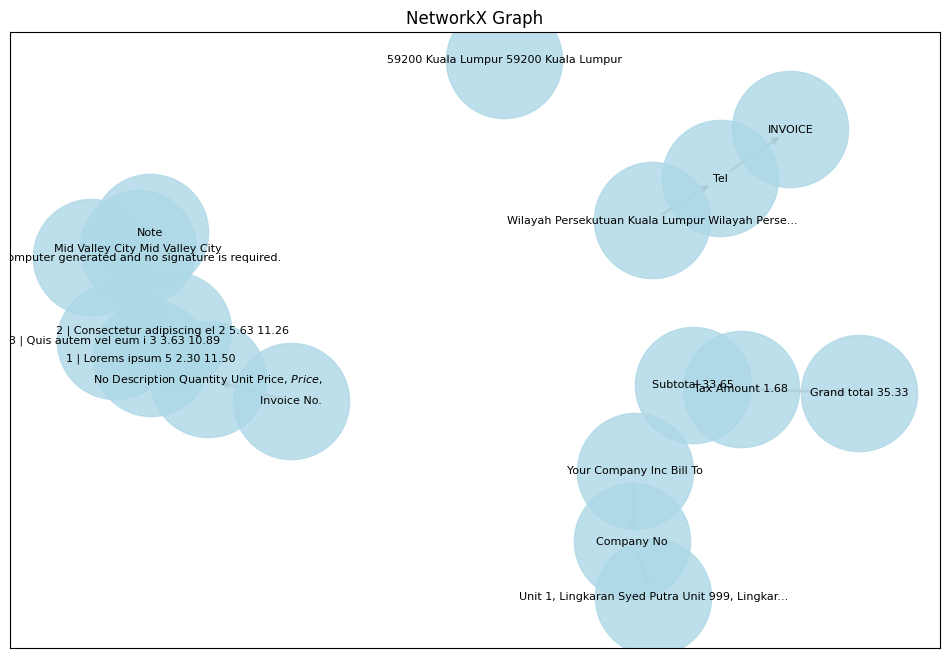

In [11]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Sample data as a dictionary
data = {
    'Index': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,17],
    'Text': ['Your Company Inc Bill To', 'Company No', 'Unit 1, Lingkaran Syed Putra Unit 999, Lingkar...', 
             'Mid Valley City Mid Valley City', '59200 Kuala Lumpur 59200 Kuala Lumpur', 
             'Wilayah Persekutuan Kuala Lumpur Wilayah Perse...', 'Tel', 'INVOICE', 
             'Invoice No.', 'No Description Quantity Unit Price, $ Price, $', 
             '1 | Lorems ipsum 5 2.30 11.50', '2 | Consectetur adipiscing el 2 5.63 11.26', 
             '3 | Quis autem vel eum i 3 3.63 10.89', 'Subtotal 33.65', 'Tax Amount 1.68', 
             'Grand total 35.33', 'Note','The tax invoice is computer generated and no signature is required.'],
    'SideNodeText': ['', 'U-1423242 Target Company Inc', '', '', '', '', '03-9876 5432 Tel: 03-1234 567', '', 
                     'INV-42532622 Invoice Date: 2021-05-23', '', '', '', '', '', '', '', 
                     'The tax invoice is computer generated and no s...',''],
    'SideNodeIndex': [-1, 2, -1, -1, -1, -1, 7, -1, 9, -1, -1, -1, -1, -1, -1, -1, 17,-1],
    'BelowNodeText': ['Company No : U-1423242 Target...', '', '', '', '', 'Tel: 03-9876 5432 Tel: 0...', '', '', '', 
                      '1 | Lorems ipsum 5 2.30 11.50', '2 | Consectetur adipiscing el 2 5.63 11.26', 
                      '3 | Quis autem vel eum i 3 3.63 10.89', '', 'Tax Amount 1.68', 'Grand total 35.33', '', '',''],
    'BelowNodeIndex': [1, -1, -1, -1, -1, 6, -1, -1, -1, 10, 11, 12, -1, 14, 15, -1, -1,-1]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Create a directed graph
G = nx.DiGraph()

# Add nodes with the index as the node identifier
for idx, row in df.iterrows():
    G.add_node(row['Index'], text=row['Text'], side_text=row['SideNodeText'], below_text=row['BelowNodeText'])

# Add edges based on SideNodeIndex and BelowNodeIndex
for idx, row in df.iterrows():
    if row['SideNodeIndex'] != -1:
        G.add_edge(row['Index'], row['SideNodeIndex'])
    if row['BelowNodeIndex'] != -1:
        G.add_edge(row['Index'], row['BelowNodeIndex'])

# Plot the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)  # positions for all nodes

# Draw the nodes
nx.draw_networkx_nodes(G, pos, node_size=7000, node_color='lightblue', alpha=0.8)

# Draw the edges
nx.draw_networkx_edges(G, pos, width=2, alpha=0.5, edge_color='gray')

# Draw the labels
labels = {node: G.nodes[node]['text'] for node in G.nodes}
nx.draw_networkx_labels(G, pos, labels, font_size=8)

plt.title("NetworkX Graph")
plt.show()


In [3]:
import pandas as pd
from neo4j import GraphDatabase

# Sample data as a dictionary
data = {
    'Index': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
    'Text': ['Your Company Inc Bill To', 'Company No', 'Unit 1, Lingkaran Syed Putra Unit 999, Lingkar...', 
             'Mid Valley City Mid Valley City', '59200 Kuala Lumpur 59200 Kuala Lumpur', 
             'Wilayah Persekutuan Kuala Lumpur Wilayah Perse...', 'Tel', 'INVOICE', 
             'Invoice No.', 'No Description Quantity Unit Price, $ Price, $', 
             '1 | Lorems ipsum 5 2.30 11.50', '2 | Consectetur adipiscing el 2 5.63 11.26', 
             '3 | Quis autem vel eum i 3 3.63 10.89', 'Subtotal 33.65', 'Tax Amount 1.68', 
             'Grand total 35.33', 'Note'],
    'SideNodeText': ['', 'U-1423242 Target Company Inc', '', '', '', '', '03-9876 5432 Tel: 03-1234 567', '', 
                     'INV-42532622 Invoice Date: 2021-05-23', '', '', '', '', '', '', '', 
                     'The tax invoice is computer generated and no s...'],
    'SideNodeIndex': [-1, 2, -1, -1, -1, -1, 7, -1, 9, -1, -1, -1, -1, -1, -1, -1, 17],
    'BelowNodeText': ['Company No : U-1423242 Target...', '', '', '', '', 'Tel: 03-9876 5432 Tel: 0...', '', '', '', 
                      '1 | Lorems ipsum 5 2.30 11.50', '2 | Consectetur adipiscing el 2 5.63 11.26', 
                      '3 | Quis autem vel eum i 3 3.63 10.89', '', 'Tax Amount 1.68', 'Grand total 35.33', '', ''],
    'BelowNodeIndex': [1, -1, -1, -1, -1, 6, -1, -1, -1, 10, 11, 12, -1, 14, 15, -1, -1]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Neo4j connection details
uri = "bolt://localhost:7687"  # Replace with your Neo4j URI
user = "neo4j"  # Replace with your Neo4j username
password = "Preetha_024"  # Replace with your Neo4j password

# Connect to Neo4j
driver = GraphDatabase.driver(uri, auth=(user, password))

def create_nodes_and_relationships(tx, df):
    for idx, row in df.iterrows():
        # Create the main node
        tx.run("CREATE (n:Node {index: $index, text: $text, side_text: $side_text, below_text: $below_text})",
               index=row['Index'], text=row['Text'], side_text=row['SideNodeText'], below_text=row['BelowNodeText'])
        
        # Create relationships based on SideNodeIndex
        if row['SideNodeIndex'] != -1:
            tx.run("""
                MATCH (a:Node {index: $index}), (b:Node {index: $side_index})
                CREATE (a)-[:SIDE]->(b)
                """, index=row['Index'], side_index=row['SideNodeIndex'])
        
        # Create relationships based on BelowNodeIndex
        if row['BelowNodeIndex'] != -1:
            tx.run("""
                MATCH (a:Node {index: $index}), (b:Node {index: $below_index})
                CREATE (a)-[:BELOW]->(b)
                """, index=row['Index'], below_index=row['BelowNodeIndex'])

# Write data to Neo4j
with driver.session() as session:
    session.write_transaction(create_nodes_and_relationships, df)

# Close the driver
driver.close()


/var/folders/w2/8j5tnyh512b_jnt1m39ll1q00000gn/T/ipykernel_1617/2629178573.py:57: DeprecationWarning: write_transaction has been renamed to execute_write
  session.write_transaction(create_nodes_and_relationships, df)


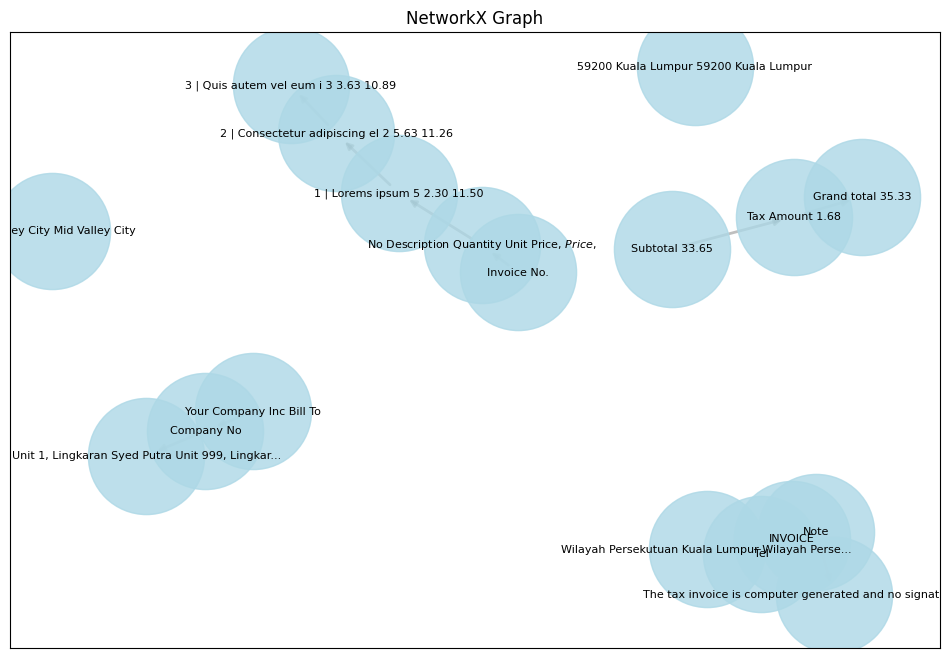

Node: INVOICE, Relationship: None, ConnectedNode: None


In [19]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from py2neo import Graph, Node, Relationship

# Sample data as a dictionary
data = {
    'Index': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,17],
    'Text': ['Your Company Inc Bill To', 'Company No', 'Unit 1, Lingkaran Syed Putra Unit 999, Lingkar...', 
             'Mid Valley City Mid Valley City', '59200 Kuala Lumpur 59200 Kuala Lumpur', 
             'Wilayah Persekutuan Kuala Lumpur Wilayah Perse...', 'Tel', 'INVOICE', 
             'Invoice No.', 'No Description Quantity Unit Price, $ Price, $', 
             '1 | Lorems ipsum 5 2.30 11.50', '2 | Consectetur adipiscing el 2 5.63 11.26', 
             '3 | Quis autem vel eum i 3 3.63 10.89', 'Subtotal 33.65', 'Tax Amount 1.68', 
             'Grand total 35.33', 'Note','The tax invoice is computer generated and no signature is required.'],
    'SideNodeText': ['', 'U-1423242 Target Company Inc', '', '', '', '', '03-9876 5432 Tel: 03-1234 567', '', 
                     'INV-42532622 Invoice Date: 2021-05-23', '', '', '', '', '', '', '', 
                     'The tax invoice is computer generated and no s...',''],
    'SideNodeIndex': [-1, 2, -1, -1, -1, -1, 7, -1, 9, -1, -1, -1, -1, -1, -1, -1, 17,-1],
    'BelowNodeText': ['Company No : U-1423242 Target...', '', '', '', '', 'Tel: 03-9876 5432 Tel: 0...', '', '', '', 
                      '1 | Lorems ipsum 5 2.30 11.50', '2 | Consectetur adipiscing el 2 5.63 11.26', 
                      '3 | Quis autem vel eum i 3 3.63 10.89', '', 'Tax Amount 1.68', 'Grand total 35.33', '', '',''],
    'BelowNodeIndex': [1, -1, -1, -1, -1, 6, -1, -1, -1, 10, 11, 12, -1, 14, 15, -1, -1,-1]
}


# Create a DataFrame
df = pd.DataFrame(data)

# Create a directed graph
G = nx.DiGraph()

# Add nodes with the index as the node identifier
for idx, row in df.iterrows():
    G.add_node(row['Index'], text=row['Text'], side_text=row['SideNodeText'], below_text=row['BelowNodeText'])

# Add edges based on SideNodeIndex and BelowNodeIndex
for idx, row in df.iterrows():
    if row['SideNodeIndex'] != -1:
        G.add_edge(row['Index'], row['SideNodeIndex'])
    if row['BelowNodeIndex'] != -1:
        G.add_edge(row['Index'], row['BelowNodeIndex'])

# Plot the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)  # positions for all nodes

# Draw the nodes
nx.draw_networkx_nodes(G, pos, node_size=7000, node_color='lightblue', alpha=0.8)

# Draw the edges
nx.draw_networkx_edges(G, pos, width=2, alpha=0.5, edge_color='gray')

# Draw the labels
labels = {node: G.nodes[node]['text'] for node in G.nodes}
nx.draw_networkx_labels(G, pos, labels, font_size=8)


plt.title("NetworkX Graph")
plt.show()

# Connect to the Neo4j database (update with your credentials)
graph_db = Graph("bolt://localhost:7687", auth=("neo4j", "Preetha_024"))

# Clear the database
graph_db.delete_all()

# Add nodes and relationships to the graph database
for idx, row in df.iterrows():
    node = Node("Invoice", index=row['Index'], text=row['Text'])
    graph_db.create(node)

# Add edges based on SideNodeIndex and BelowNodeIndex
for idx, row in df.iterrows():
    if row['SideNodeIndex'] != -1:
        start_node = graph_db.nodes.match("Invoice", index=row['Index']).first()
        end_node = graph_db.nodes.match("Invoice", index=row['SideNodeIndex']).first()
        rel = Relationship(start_node, "SIDE_NODE", end_node)
        graph_db.create(rel)
    if row['BelowNodeIndex'] != -1:
        start_node = graph_db.nodes.match("Invoice", index=row['Index']).first()
        end_node = graph_db.nodes.match("Invoice", index=row['BelowNodeIndex']).first()
        rel = Relationship(start_node, "BELOW_NODE", end_node)
        graph_db.create(rel)

# Function to navigate the graph based on text provided
def navigate_graph(text):
    query = f"""
    MATCH (n:Invoice) WHERE n.text CONTAINS '{text}'
    OPTIONAL MATCH (n)-[r]->(m)
    RETURN n.text AS Node, type(r) AS Relationship, m.text AS ConnectedNode
    """
    result = graph_db.run(query)
    for record in result:
        print(f"Node: {record['Node']}, Relationship: {record['Relationship']}, ConnectedNode: {record['ConnectedNode']}")

# Example navigation based on text provided
navigate_graph("INVOICE")


In [21]:
import os
from email import policy
from email.parser import BytesParser
from bs4 import BeautifulSoup
import pytesseract
from PIL import Image

def save_images_from_eml(eml_path, output_dir):
    with open(eml_path, 'rb') as f:
        msg = BytesParser(policy=policy.default).parse(f)

    os.makedirs(output_dir, exist_ok=True)

    for part in msg.walk():
        if part.get_content_type() == 'text/html':
            html_content = part.get_payload(decode=True).decode('utf-8')
            with open(os.path.join(output_dir, 'email.html'), 'w', encoding='utf-8') as html_file:
                html_file.write(html_content)

        if part.get_content_maintype() == 'image':
            img_data = part.get_payload(decode=True)
            img_name = part.get_filename()
            img_path = os.path.join(output_dir, img_name)
            with open(img_path, 'wb') as img_file:
                img_file.write(img_data)

def convert_html_to_text(html_path, text_output_path):
    with open(html_path, 'r', encoding='utf-8') as html_file:
        html_content = html_file.read()

    soup = BeautifulSoup(html_content, 'html.parser')
    text_content = soup.get_text()

    with open(text_output_path, 'w', encoding='utf-8') as text_file:
        text_file.write(text_content)

def validate_image_text(img_path):
    text = pytesseract.image_to_string(Image.open(img_path))
    return text.strip() != ''

def replace_image_with_text_in_email(html_path, output_path):
    with open(html_path, 'r', encoding='utf-8') as html_file:
        html_content = html_file.read()

    soup = BeautifulSoup(html_content, 'html.parser')

    for img_tag in soup.find_all('img'):
        img_src = img_tag['src']
        img_path = os.path.join(os.path.dirname(html_path), img_src)
        if validate_image_text(img_path):
            ocr_text = pytesseract.image_to_string(Image.open(img_path))
            img_tag.replace_with(ocr_text)

    modified_text = soup.get_text()
    with open(output_path, 'w', encoding='utf-8') as text_file:
        text_file.write(modified_text)

# Full workflow for an EML file
def process_eml_file(eml_path, output_dir):
    save_images_from_eml(eml_path, output_dir)
    html_path = os.path.join(output_dir, 'email.html')
    text_output_path = os.path.join(output_dir, 'modified_email.txt')
    replace_image_with_text_in_email(html_path, text_output_path)

process_eml_file('INV2.eml', '.')


FileNotFoundError: [Errno 2] No such file or directory: '/Users/sivaramakrishnan/Development/ML/cid:B9545509-4702-4D81-970C-9DBDB5ED0BF0'

In [3]:
from transformers import AutoModelForTokenClassification, AutoTokenizer
from transformers import pipeline

# Load the pre-trained model and tokenizer
model_name = "dbmdz/bert-large-cased-finetuned-conll03-english"
model = AutoModelForTokenClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Create a pipeline for NER
nlp_ner = pipeline("ner", model=model, tokenizer=tokenizer)

def extract_entities(text):
    # Apply the NER pipeline to the input text
    ner_results = nlp_ner(text)
    
    # Initialize variables for the entities
    invoice_number = None
    invoice_date = None
    amount = None
    
    # Iterate through the recognized entities
    for entity in ner_results:
        word = entity['word']
        if "INV" in word.upper():
            invoice_number = word
        elif entity['entity'] == "B-DATE" or entity['entity'] == "I-DATE":
            invoice_date = word
        elif entity['entity'] == "B-MONEY" or entity['entity'] == "I-MONEY":
            amount = word
    
    # Return the extracted entities in a dictionary
    return {
        "Invoice Number": invoice_number,
        "Invoice Date": invoice_date,
        "Amount": amount
    }

# Example usage
text = "The total amount of the attached invoice number INV1234 billed on 20-Aug-2024 is 100"
entities = extract_entities(text)

print(f"Invoice Number: {entities['Invoice Number']}")
print(f"Invoice Date: {entities['Invoice Date']}")
print(f"Amount: {entities['Amount']}")


Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


Invoice Number: None
Invoice Date: None
Amount: None


In [2]:
import spacy

# Load the pre-trained spaCy model
nlp = spacy.load("en_core_web_sm")

def extract_entities(text):
    # Process the input text with the spaCy model
    doc = nlp(text)
    
    # Initialize variables for the entities
    invoice_number = None
    invoice_date = None
    amount = None
    
    # Iterate through the entities in the document
    for ent in doc.ents:
        if "INV" in ent.text.upper():
            invoice_number = ent.text
        elif ent.label_ == "DATE":
            invoice_date = ent.text
        elif ent.label_ == "MONEY":
            amount = ent.text

    # Return the extracted entities in a dictionary
    return {
        "Invoice Number": invoice_number,
        "Invoice Date": invoice_date,
        "Amount": amount
    }

# Example usage
text = "The total amount of the attached invoice number INV1234 billed on 20-Aug-2024 is 100 Rs."
entities = extract_entities(text)

print(f"Invoice Number: {entities['Invoice Number']}")
print(f"Invoice Date: {entities['Invoice Date']}")
print(f"Amount: {entities['Amount']}")


Invoice Number: None
Invoice Date: 20-Aug-2024
Amount: None


In [38]:
import spacy
import re

# Load the spaCy model for English
nlp = spacy.load("en_core_web_md")

def extract_invoice_amount(doc):
    # Regular expression to identify the amount
    invoice_amount = None
    for token in doc:
        if token.text.lower() == "tax" and token.head.text.lower() == "amount":
            # Look for the amount associated with this token
            amount_pattern = r'(\d+(?:,\d{3})*(?:\.\d{1,2})?)'
            match = re.search(amount_pattern, doc.text)
            if match:
                invoice_amount = match.group(1)
                break
    return invoice_amount

def print_word_relationships(doc,word):
    for token in doc:
        if token.text == word:
            print(f"Word: {token.text}, Embedding: {token.vector[:5]}... (truncated), Relation: {token.dep_}, Head: {token.head.text}")

# Example text
text = "The attached invoice amount of 100, with a tax amount of 10, making the total amount 120. Please make the payment to Siva & Co using account number 12345678 at ABC Bank, Chennai"

# Process the text using spaCy
doc = nlp(text)

# Extract the invoice amount
invoice_amount = extract_invoice_amount(doc)
if invoice_amount:
    print(f"Extracted Invoice Amount: Rs {invoice_amount}")
else:
    print("Invoice amount not found.")

# Print word embeddings and their relationships
print("\nWord Embeddings and Relationships:")
print_word_relationships(doc, "invoice")


Extracted Invoice Amount: Rs 100

Word Embeddings and Relationships:
Word: invoice, Embedding: [-0.49591 -2.1745  -0.56583 -1.2088   4.4299 ]... (truncated), Relation: compound, Head: amount


In [30]:
import re
from gensim.models import Word2Vec
from scipy.spatial.distance import cosine

# Function to find the word closest to the target word using cosine similarity
def find_closest_word(target_word, words, model):
    if target_word not in model.wv:
        return None
    
    target_vec = model.wv[target_word]
    closest_word = None
    min_distance = float('inf')
    
    for word in words:
        if word in model.wv:
            word_vec = model.wv[word]
            distance = cosine(target_vec, word_vec)
            if distance < min_distance:
                min_distance = distance
                closest_word = word
    
    return closest_word

# Function to extract amounts irrespective of currency
def extract_data(text, target_word, model,pattern):
    words = text.split()
    closest_word = find_closest_word(target_word, words, model)
    
    if closest_word:
        # Find the amount related to the closest word
        for i, word in enumerate(words):
            if word == closest_word:
                # Look around in the text for numerical values
                for j in range(i+1, len(words)):
                    # Match numerical values, allowing for commas and periods
                    amount_pattern = pattern
                    print(amount_pattern,words[j])
                    match = re.findall(amount_pattern, words[j])
                    if match:
                        print(match)

In [3]:
text = "Please pay the total amount of Rs 120, which includes the invoice amount of Rs 100 and tax of Rs 10, for Invoice Number INV-12345 dated 20 July 2024, to Siva & Co. The payment should be made to account number 12345678 at ABC Bank, Chennai."
#text = "Please see the attached Invoice Number INV-67890 dated 15 August 2024. The total amount due is $ 150, which includes the invoice amount of $ 130 and tax of $ 20. The payment is due by 30 August 2024"
#text = "The attached invoice amount of 100, with a tax amount of 10, making the total amount 120. Please make the payment to Siva & Co. using account number 12345678 at ABC Bank, Chennai"

In [4]:
# Split the text into sentences
sentences = text.split('. ')

# Split each sentence into words and create the list of lists
sentences = [sentence.split() for sentence in sentences]

# Print the result
for sentence in sentences:
    print(sentence)

# Train a Word2Vec model
model = Word2Vec(sentences, vector_size=50, window=3, min_count=1, sg=0)

['Please', 'pay', 'the', 'total', 'amount', 'of', 'Rs', '120,', 'which', 'includes', 'the', 'invoice', 'amount', 'of', 'Rs', '100', 'and', 'tax', 'of', 'Rs', '10,', 'for', 'Invoice', 'Number', 'INV-12345', 'dated', '20', 'July', '2024,', 'to', 'Siva', '&', 'Co']
['The', 'payment', 'should', 'be', 'made', 'to', 'account', 'number', '12345678', 'at', 'ABC', 'Bank,', 'Chennai.']


In [5]:
find_closest_word("Invoice", sentences[0], model)

'Invoice'

In [32]:
pat = '(\d+(?:,\d{3})*(?:\.\d{1,2})?)'
#pat = '([A-Z0-9-]+)'
extract_data(text, "Invoice", model, pat)

(\d+(?:,\d{3})*(?:\.\d{1,2})?) Number
(\d+(?:,\d{3})*(?:\.\d{1,2})?) INV-12345
['12345']
(\d+(?:,\d{3})*(?:\.\d{1,2})?) dated
(\d+(?:,\d{3})*(?:\.\d{1,2})?) 20
['20']
(\d+(?:,\d{3})*(?:\.\d{1,2})?) July
(\d+(?:,\d{3})*(?:\.\d{1,2})?) 2024,
['2024']
(\d+(?:,\d{3})*(?:\.\d{1,2})?) to
(\d+(?:,\d{3})*(?:\.\d{1,2})?) Siva
(\d+(?:,\d{3})*(?:\.\d{1,2})?) &
(\d+(?:,\d{3})*(?:\.\d{1,2})?) Co.
(\d+(?:,\d{3})*(?:\.\d{1,2})?) The
(\d+(?:,\d{3})*(?:\.\d{1,2})?) payment
(\d+(?:,\d{3})*(?:\.\d{1,2})?) should
(\d+(?:,\d{3})*(?:\.\d{1,2})?) be
(\d+(?:,\d{3})*(?:\.\d{1,2})?) made
(\d+(?:,\d{3})*(?:\.\d{1,2})?) to
(\d+(?:,\d{3})*(?:\.\d{1,2})?) account
(\d+(?:,\d{3})*(?:\.\d{1,2})?) number
(\d+(?:,\d{3})*(?:\.\d{1,2})?) 12345678
['12345678']
(\d+(?:,\d{3})*(?:\.\d{1,2})?) at
(\d+(?:,\d{3})*(?:\.\d{1,2})?) ABC
(\d+(?:,\d{3})*(?:\.\d{1,2})?) Bank,
(\d+(?:,\d{3})*(?:\.\d{1,2})?) Chennai.


In [33]:
import numpy as np
from gensim.models import Word2Vec
from scipy.spatial.distance import cosine

# Example sentences for training the Word2Vec model
sentences = [
    ["Please", "pay", "the", "total", "amount", "of", "Rs", "120"],
    ["which", "includes", "the", "invoice", "amount", "of", "Rs", "100"],
    ["and", "tax", "of", "Rs", "10"],
    ["for", "Invoice", "Number", "INV-12345"],
    ["dated", "20", "July", "2024"],
    ["to", "Siva", "&", "Co"],
    ["The", "payment", "should", "be", "made", "to", "account", "number", "12345678"],
    ["at", "ABC", "Bank", "Chennai"]
]

# Train a Word2Vec model
model = Word2Vec(sentences, vector_size=50, window=3, min_count=1, sg=0)

def sentence_embedding(sentence, model):
    words = sentence.split()
    embeddings = [model.wv[word] for word in words if word in model.wv]
    if not embeddings:
        return np.zeros(model.vector_size)
    return np.mean(embeddings, axis=0)

# Example sentences for similarity
sentence1 = "Please pay the total amount of Rs 120, which includes the invoice amount of Rs 100 and tax of Rs 10, for Invoice Number INV-12345 dated 20 July 2024, to Siva & Co. The payment should be made to account number 12345678 at ABC Bank, Chennai."
sentence2 = "Please send Rs 100 for Invoice INV-12345 dated July 20, 2024, to Siva & Co. The payment can be made to account 12345678 at ABC Bank."

# Compute embeddings
embedding1 = sentence_embedding(sentence1, model)
embedding2 = sentence_embedding(sentence2, model)

# Compute cosine similarity
similarity = 1 - cosine(embedding1, embedding2)
print(f"Cosine Similarity: {similarity:.4f}")


Cosine Similarity: 0.7180


In [38]:
from sentence_transformers import SentenceTransformer, util

# Load pre-trained Sentence Transformer model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Define the sentence
sentence = "Please pay the total amount of Rs 120, which includes the invoice amount of Rs 100 and tax of Rs 10, for Invoice Number INV-12345 dated 20 July 2024, to Siva & Co. The payment should be made to account number 12345678 at ABC Bank, Chennai."

# Tokenize the sentence
words = sentence.split()

# Compute embeddings for each word
word_embeddings = {}
for word in words:
    embedding = model.encode(word)
    word_embeddings[word] = embedding

# Compute similarity for each pair of words
similarities = {}
for word1 in word_embeddings:
    for word2 in word_embeddings:
        if word1 != word2:
            similarity = util.pytorch_cos_sim(word_embeddings[word1], word_embeddings[word2]).item()
            similarities[(word1, word2)] = similarity

# Print similarities
for pair, sim in similarities.items():
    print(f"Similarity between '{pair[0]}' and '{pair[1]}': {sim:.4f}")


Similarity between 'Please' and 'pay': 0.2622
Similarity between 'Please' and 'the': 0.2776
Similarity between 'Please' and 'total': 0.3390
Similarity between 'Please' and 'amount': 0.2279
Similarity between 'Please' and 'of': 0.3318
Similarity between 'Please' and 'Rs': 0.2027
Similarity between 'Please' and '120,': 0.2099
Similarity between 'Please' and 'which': 0.3352
Similarity between 'Please' and 'includes': 0.2890
Similarity between 'Please' and 'invoice': 0.2510
Similarity between 'Please' and '100': 0.2936
Similarity between 'Please' and 'and': 0.3198
Similarity between 'Please' and 'tax': 0.1946
Similarity between 'Please' and '10,': 0.2807
Similarity between 'Please' and 'for': 0.3530
Similarity between 'Please' and 'Invoice': 0.2510
Similarity between 'Please' and 'Number': 0.2673
Similarity between 'Please' and 'INV-12345': 0.2168
Similarity between 'Please' and 'dated': 0.2095
Similarity between 'Please' and '20': 0.2753
Similarity between 'Please' and 'July': 0.2738
Simi

In [46]:
from sentence_transformers import SentenceTransformer, util
import re

# Load pre-trained Sentence Transformer model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Define the sentence
sentence = "Please pay the total amount of Rs 120, which includes the invoice amount of Rs 100 and tax of Rs 10, for Invoice Number INV-12345 dated 20 July 2024, to Siva & Co. The payment should be made to account number 12345678 at ABC Bank, Chennai."

# Define target phrases
target_phrases = {
    "Invoice Number": None,
    "invoice": None,
    "tax": None
}

# Tokenize the sentence
words = sentence.split()

# Compute embeddings for each word in the sentence
word_embeddings = {word: model.encode(word) for word in words if word.strip()}

# Compute embeddings for target phrases
target_embeddings = {phrase: model.encode(phrase) for phrase in target_phrases.keys()}

# Function to extract entity based on highest similarity score
def extract_entity(sentence, target_phrases, word_embeddings, model):
    # Compute sentence embedding
    sentence_embedding = model.encode(sentence)
    
    # Compute similarity for each target phrase
    similarities = {}
    for phrase, target_embedding in target_embeddings.items():
        sim = util.pytorch_cos_sim(sentence_embedding, target_embedding).item()
        similarities[phrase] = sim
    
    # Extract entities based on similarity scores
    extracted_entities = {}
    for phrase, similarity in similarities.items():
        if similarity > 0.7:  # Threshold for similarity (can be adjusted)
            for word, word_embedding in word_embeddings.items():
                word_sim = util.pytorch_cos_sim(target_embeddings[phrase], word_embedding).item()
                if word_sim > 0:
                    extracted_entities[phrase] = word
                    break
    
    return extracted_entities

# Extract entities
extracted_entities = extract_entity(sentence, target_phrases, word_embeddings, model)

# Print extracted entities
for entity, value in extracted_entities.items():
    print(f"{entity}: {value}")
